In [1]:
import pandas as pd

In [6]:
filename = "data\dados_roubo_celular_sp_2020.xlsx"

df_roubos = pd.read_excel(filename)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Rion\AppData\Local\Temp\ipykernel_12836\1966312971.py:1: SyntaxWarning: invalid escape sequence '\d'
  filename = "data\dados_roubo_celular_sp_2020.xlsx"


In [7]:
df_roubos.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2020,1646238,1646238/2020,01/11/2020 00:03:07,01/11/2020 00:01:32,31/10/2020,16:30,A TARDE,31/10/2020,01/11/2020 00:03:07,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,ASUS
1,2020,1646283,1646283/2020,01/11/2020 00:07:02,01/11/2020 00:06:41,31/10/2020,23:00,A NOITE,01/11/2020,01/11/2020 00:07:02,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG
2,2020,1646274,1646274/2020,01/11/2020 00:10:26,01/11/2020 00:10:26,31/10/2020,21:42,A NOITE,31/10/2020,01/11/2020 00:10:26,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,APPLE
3,2020,1646303,1646303/2020,01/11/2020 00:21:22,01/11/2020 00:21:39,31/10/2020,14:17,A TARDE,01/11/2020,01/11/2020 00:21:22,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI
4,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,EQT9081,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,APPLE


In [8]:
df_roubos.columns

Index(['ANO_BO', 'NUM_BO', 'NUMERO_BOLETIM', 'BO_INICIADO', 'BO_EMITIDO',
       'DATAOCORRENCIA', 'HORAOCORRENCIA', 'PERIDOOCORRENCIA',
       'DATACOMUNICACAO', 'DATAELABORACAO', 'BO_AUTORIA', 'FLAGRANTE',
       'NUMERO_BOLETIM_PRINCIPAL', 'LOGRADOURO', 'NUMERO', 'BAIRRO', 'CIDADE',
       'UF', 'LATITUDE', 'LONGITUDE', 'DESCRICAOLOCAL', 'EXAME', 'SOLUCAO',
       'DELEGACIA_NOME', 'DELEGACIA_CIRCUNSCRICAO', 'ESPECIE', 'RUBRICA',
       'DESDOBRAMENTO', 'STATUS', 'NOMEPESSOA', 'TIPOPESSOA', 'VITIMAFATAL',
       'RG', 'RG_UF', 'NATURALIDADE', 'NACIONALIDADE', 'SEXO',
       'DATANASCIMENTO', 'IDADE', 'ESTADOCIVIL', 'PROFISSAO', 'GRAUINSTRUCAO',
       'CORCUTIS', 'NATUREZAVINCULADA', 'TIPOVINCULO', 'RELACIONAMENTO',
       'PARENTESCO', 'PLACA_VEICULO', 'UF_VEICULO', 'CIDADE_VEICULO',
       'DESCR_COR_VEICULO', 'DESCR_MARCA_VEICULO', 'ANO_FABRICACAO',
       'ANO_MODELO', 'DESCR_TIPO_VEICULO', 'QUANT_CELULAR', 'MARCA_CELULAR'],
      dtype='object')

In [10]:
df_roubos[['LATITUDE', 'LONGITUDE']]

,LATITUDE,LONGITUDE
0,NaN,NaN
1,-23.686360,-46.765585
2,-23.612298,-46.609388
3,-23.640576,-46.760755
4,-23.593117,-46.606192
...,...,...
16367,NaN,NaN
16368,NaN,NaN
16369,NaN,NaN
16370,NaN,NaN


In [11]:
df_roubos = df_roubos.dropna(subset=['LATITUDE', 'LONGITUDE'])

In [12]:
df_roubos[['LATITUDE', 'LONGITUDE']]

,LATITUDE,LONGITUDE
1,-23.686360,-46.765585
2,-23.612298,-46.609388
3,-23.640576,-46.760755
4,-23.593117,-46.606192
5,-23.593117,-46.606192
...,...,...
16363,-23.627340,-46.716842
16364,-23.635372,-46.492679
16365,-23.538349,-46.486512
16366,-23.632600,-46.736134


In [13]:
from shapely.geometry import Point

In [16]:
df_roubos['geometry'] = None

for index, row in df_roubos.iterrows():
    df_roubos.loc[index, 'geometry'] = Point(row.LONGITUDE, row.LATITUDE)

C:\Users\Rion\AppData\Local\Temp\ipykernel_12836\1824120445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_roubos['geometry'] = None


In [17]:
df_roubos.head(5)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometry
1,2020,1646283,1646283/2020,01/11/2020 00:07:02,01/11/2020 00:06:41,31/10/2020,23:00,A NOITE,01/11/2020,01/11/2020 00:07:02,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG,POINT (-46.7655849940429 -23.6863604960612)
2,2020,1646274,1646274/2020,01/11/2020 00:10:26,01/11/2020 00:10:26,31/10/2020,21:42,A NOITE,31/10/2020,01/11/2020 00:10:26,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,APPLE,POINT (-46.6093881566447 -23.6122975624363)
3,2020,1646303,1646303/2020,01/11/2020 00:21:22,01/11/2020 00:21:39,31/10/2020,14:17,A TARDE,01/11/2020,01/11/2020 00:21:22,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI,POINT (-46.7607553457118 -23.6405763334634)
4,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,APPLE,POINT (-46.6061920346 -23.5931170972)
5,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,SAMSUNG,POINT (-46.6061920346 -23.5931170972)


In [18]:
type(df_roubos)

pandas.core.frame.DataFrame

In [19]:
import geopandas as gpd

In [21]:
gdf_roubos = gpd.GeoDataFrame(df_roubos, geometry='geometry')

In [22]:
type(gdf_roubos)

geopandas.geodataframe.GeoDataFrame

In [23]:
gdf_roubos.head(5)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometry
1,2020,1646283,1646283/2020,01/11/2020 00:07:02,01/11/2020 00:06:41,31/10/2020,23:00,A NOITE,01/11/2020,01/11/2020 00:07:02,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG,POINT (-46.76558 -23.68636)
2,2020,1646274,1646274/2020,01/11/2020 00:10:26,01/11/2020 00:10:26,31/10/2020,21:42,A NOITE,31/10/2020,01/11/2020 00:10:26,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,APPLE,POINT (-46.60939 -23.6123)
3,2020,1646303,1646303/2020,01/11/2020 00:21:22,01/11/2020 00:21:39,31/10/2020,14:17,A TARDE,01/11/2020,01/11/2020 00:21:22,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI,POINT (-46.76076 -23.64058)
4,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,APPLE,POINT (-46.60619 -23.59312)
5,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,SAMSUNG,POINT (-46.60619 -23.59312)


<Axes: >

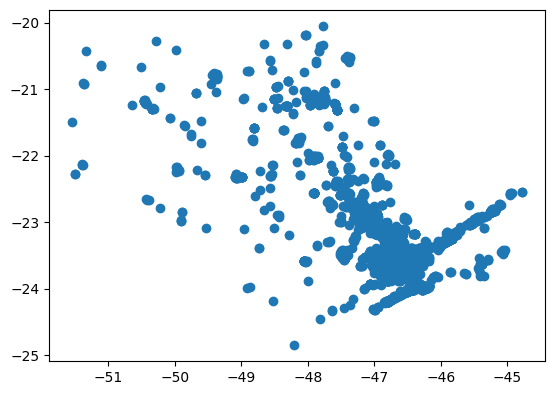

In [24]:
gdf_roubos.plot()

In [25]:
filename = 'data\capital_são_paulo.json'

gdf_capital_sp = gpd.read_file(filename, driver='GeoJSON')

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Rion\AppData\Local\Temp\ipykernel_12836\2985620376.py:1: SyntaxWarning: invalid escape sequence '\c'
  filename = 'data\capital_são_paulo.json'
c:\Users\Rion\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:196: RuntimeWarning: driver GeoJSON does not support open option DRIVER
  return ogr_read(


<Axes: >

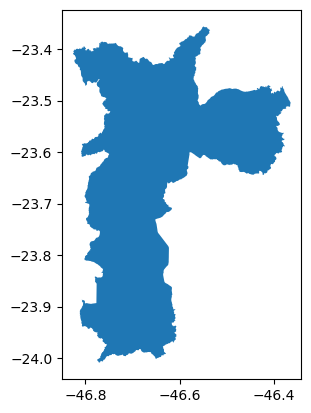

In [26]:
gdf_capital_sp.plot()

In [28]:
import matplotlib.pyplot as plt

<Axes: >

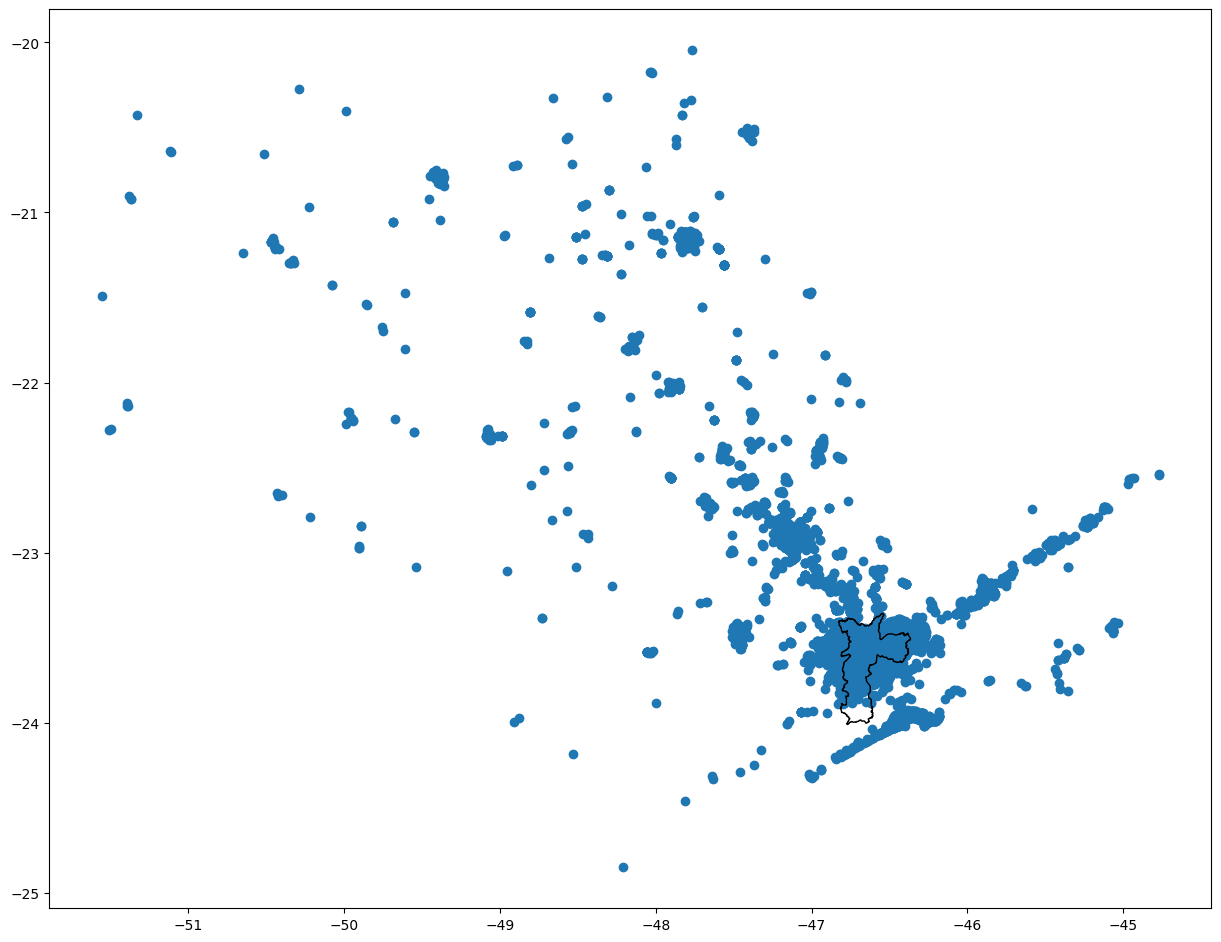

In [32]:
fig, ax = plt.subplots(figsize=(15,15))

gdf_roubos.plot(ax=ax)
gdf_capital_sp.plot(ax=ax,
                    facecolor='None',
                    edgecolor='black')

In [33]:
polygon_sp = gdf_capital_sp.iloc[0].geometry

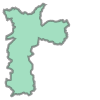

In [34]:
polygon_sp

In [35]:
type(polygon_sp)

shapely.geometry.polygon.Polygon

In [36]:
gdf_roubos.intersects(polygon_sp)

1         True
2         True
3         True
4         True
5         True
         ...  
16363     True
16364    False
16365     True
16366     True
16371     True
Length: 14668, dtype: bool

In [37]:
gdf_roubos_capital = gdf_roubos[gdf_roubos.intersects(polygon_sp)]

In [38]:
gdf_roubos_capital

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,geometry
1,2020,1646283,1646283/2020,01/11/2020 00:07:02,01/11/2020 00:06:41,31/10/2020,23:00,A NOITE,01/11/2020,01/11/2020 00:07:02,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG,POINT (-46.76558 -23.68636)
2,2020,1646274,1646274/2020,01/11/2020 00:10:26,01/11/2020 00:10:26,31/10/2020,21:42,A NOITE,31/10/2020,01/11/2020 00:10:26,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,APPLE,POINT (-46.60939 -23.6123)
3,2020,1646303,1646303/2020,01/11/2020 00:21:22,01/11/2020 00:21:39,31/10/2020,14:17,A TARDE,01/11/2020,01/11/2020 00:21:22,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,XIAOMI,POINT (-46.76076 -23.64058)
4,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,APPLE,POINT (-46.60619 -23.59312)
5,2020,1646234,1646234/2020,01/11/2020 00:29:43,01/11/2020 00:29:44,31/10/2020,19:05,A NOITE,31/10/2020,01/11/2020 00:29:43,...,SP,SÃO CAETANO DO SUL,Cinza,I/VW TIGUAN ALLSPACE,2018.0,NaN,AUTOMOVEL,NaN,SAMSUNG,POINT (-46.60619 -23.59312)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16362,2020,1841961,1841961/2020,30/11/2020 15:02:26,30/11/2020 23:27:38,29/11/2020,06:00,PELA MANHÃ,30/11/2020,30/11/2020 15:02:26,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Outros,POINT (-46.72441 -23.61643)
16363,2020,1845708,1845708/2020,30/11/2020 23:28:18,30/11/2020 23:28:26,30/11/2020,18:40,A NOITE,30/11/2020,30/11/2020 23:28:18,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,SAMSUNG,POINT (-46.71684 -23.62734)
16365,2020,1845294,1845294/2020,30/11/2020 23:39:36,30/11/2020 23:39:41,30/11/2020,19:45,A NOITE,30/11/2020,30/11/2020 23:39:36,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,MOTOROLA,POINT (-46.48651 -23.53835)
16366,2020,2348,2348/2020,30/11/2020 23:11:40,30/11/2020 23:44:10,30/11/2020,22:47,A NOITE,30/11/2020,30/11/2020 23:11:40,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1.0,Apple,POINT (-46.73613 -23.6326)


<Axes: >

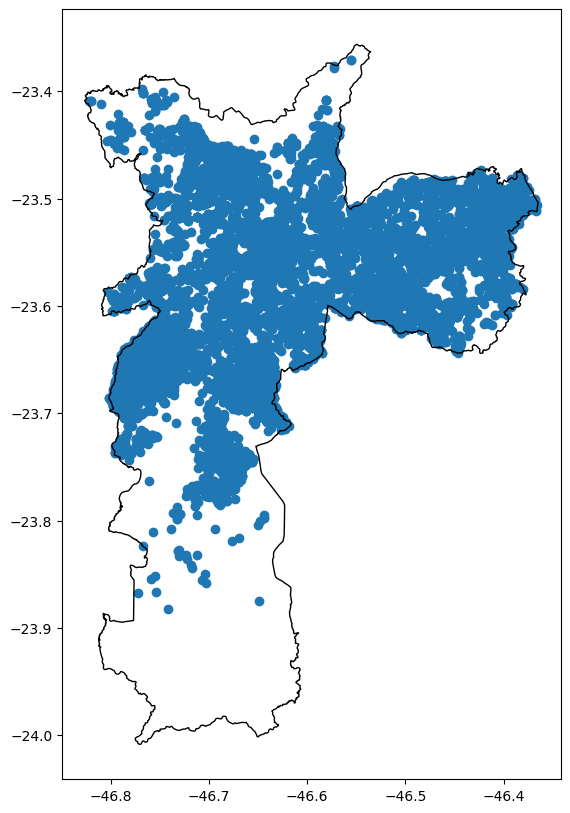

In [39]:
fig, ax = plt.subplots(figsize=(10,10))

gdf_roubos_capital.plot(ax=ax)
gdf_capital_sp.plot(ax=ax,
                    facecolor='None',
                    edgecolor='black')

In [40]:
filename = 'data/roubo_celular_capital.json'

gdf_roubos_capital.to_file(filename, driver='GeoJSON')

c:\Users\Rion\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(
